In [1]:
import pandas as pd
import os # To interact with your working directory
os.getcwd()

'c:\\Crisarch\\Programming\\DataAnalysisScient\\Udemy\\PythonAZForDataScienceWithRealExcercises\\Section6_AdvancedVisualization'

In [2]:
movies = pd.read_csv("S6-Movie-Ratings.csv")
len(movies)

559

In [3]:
movies.head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [8]:
# We need to fix Year values because althought it was treated as an integer, it isn't
# Here you start to convert values into a Category Values
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [9]:
movies.info() # Here you'd see that Film is a category instead of an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [10]:
# Installing libraries for visualization in Jupyter Notebook
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [11]:
# Working with Joinplots
from matplotlib import pyplot as plt
import seaborn as sns
# renderize the graph
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

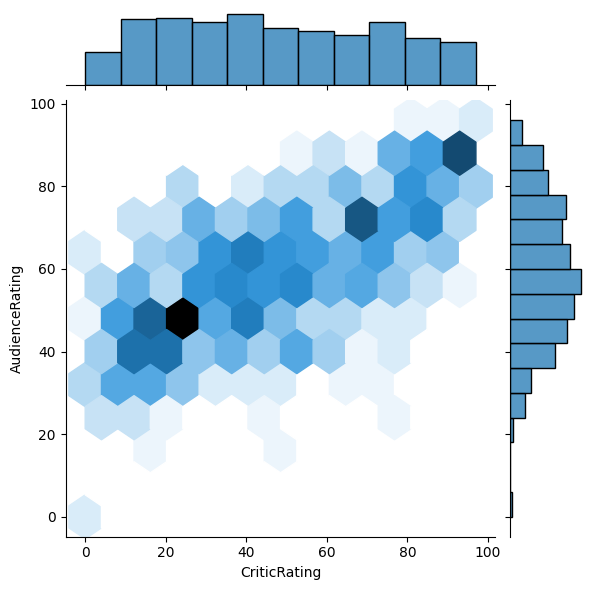

In [12]:
# Joinplot
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')
plt.show()

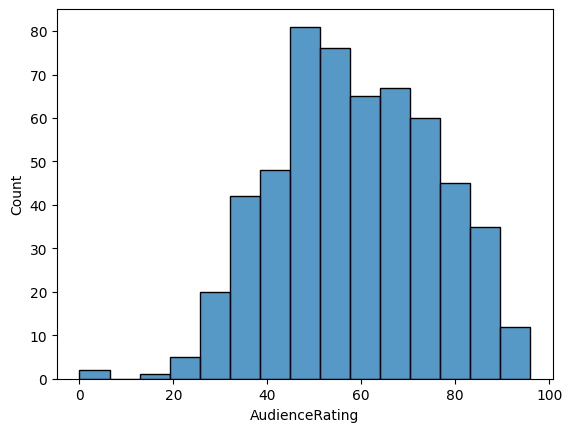

In [13]:
#Histograms
m1 = sns.histplot(movies.AudienceRating, bins=15) # distplot(the one in the tutorial) is a depracated option. Used the histplot() one
plt.show()

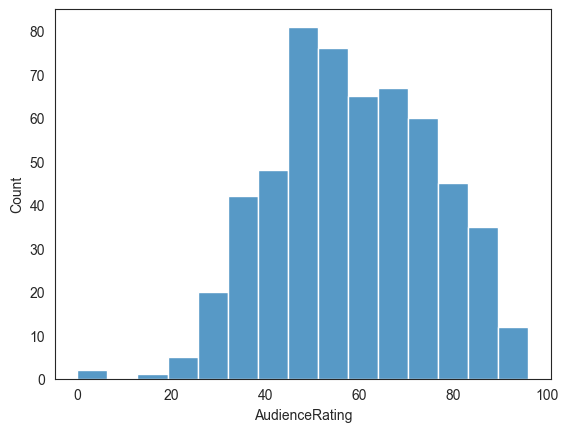

In [14]:
#Histograms
sns.set_style("white") # changing the style to the histogram: darkgrid is another option instead of white
m2 = sns.histplot(movies.AudienceRating, bins=15) # distplot(the one in the tutorial) is a depracated option. Used the histplot() one
plt.show()

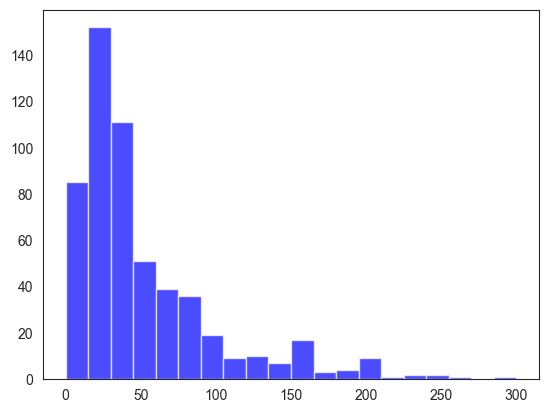

In [15]:
# Stacked Histograms
plt.hist(movies.BudgetMillions, bins=20, color='blue', alpha=0.7)
plt.show()


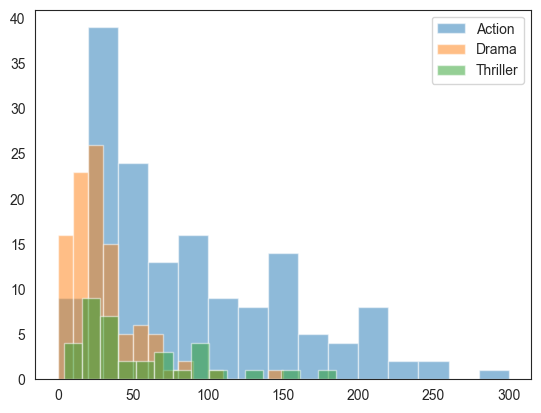

In [16]:
# Adding different charts to the same graph
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15, label='Action', alpha=0.5) # Search for a list in which filters out by a specific Genre and associates the column BudgetMillions
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15, label='Drama', alpha=0.5)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15, label='Thriller', alpha=0.5)

# Adding legends
plt.legend()

plt.show()

In [17]:
# Iterate over the Genres
for gen in movies.Genre.cat.categories: # .cat.categories is used to get the categories of a categorical variable
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


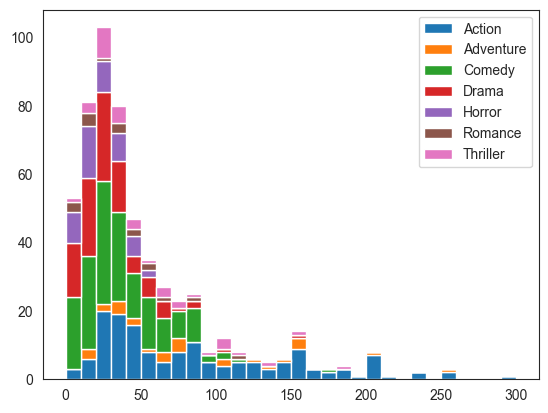

In [18]:
# Create an empty list
list1 = []

for gen in movies.Genre.cat.categories: # .cat.categories is used to get the categories of a categorical variable
    list1.append(movies[movies.Genre == gen].BudgetMillions)

mylabels = movies.Genre.cat.categories
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels) # rwidth is the relative width of the bars
plt.legend()
plt.show()

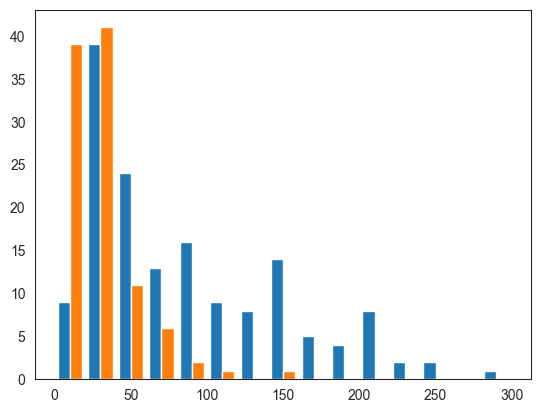

In [19]:
# Values were overlapped before. Adding a list of values would be benefitial
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, ],bins=15, stacked=False)
plt.show()

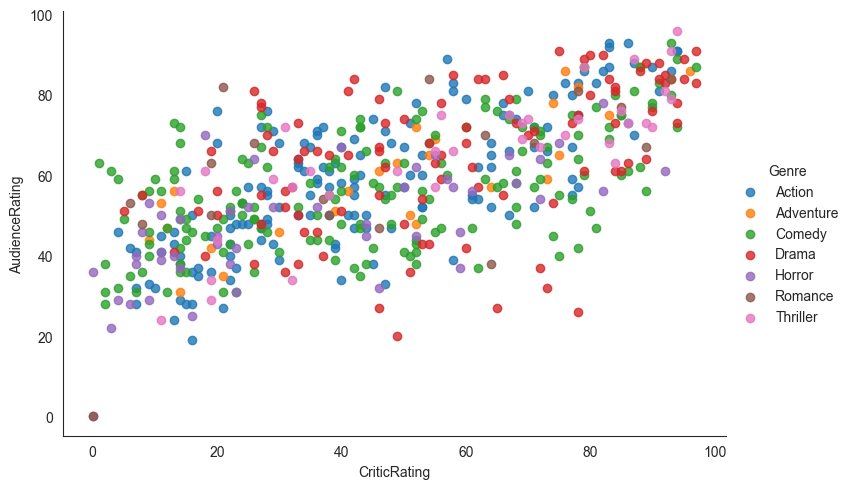

In [20]:
# KDE Plots. Kernel Density Estimation Plots
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                  hue='Genre', fit_reg=False, aspect=1.5) # fit_reg=False removes the regression line

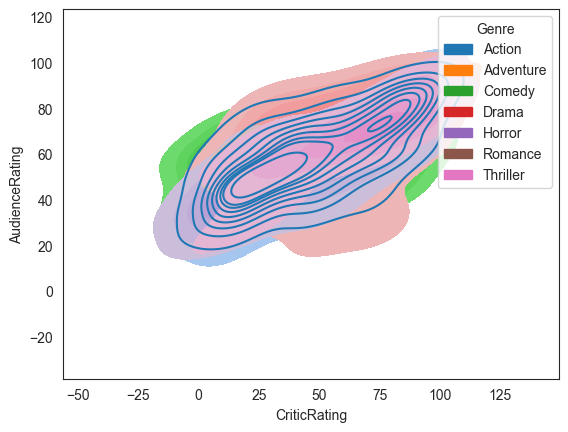

In [21]:
# Another way to do it by using the KDE plot
#kl = sns.kdeplot(movies.CriticRating, movies.AudienceRating) # por cambio de versión de seaborn, no funciona
from matplotlib.pyplot import colormaps


kl = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating',
                 hue='Genre', fill=True, aspect=1, shade=True, cmap= 'Reds') # fill=True fills the area below the lines

# Tips: Running 2 charts at the same time
klb = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                  colormaps='Blues')


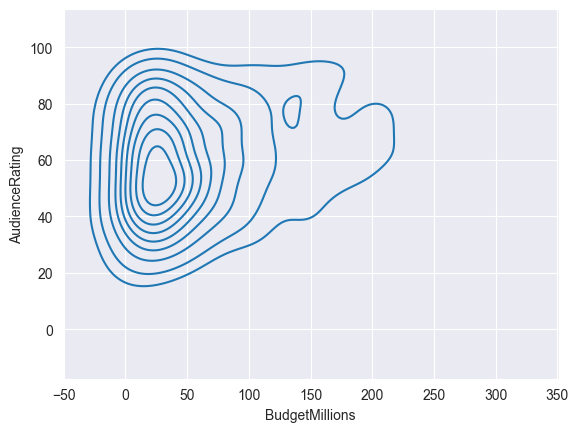

In [22]:
# Working with Subplots()
sns.set_style('darkgrid')
kl = sns.kdeplot(movies, x='BudgetMillions', y='AudienceRating')
# --- IGNORE ---


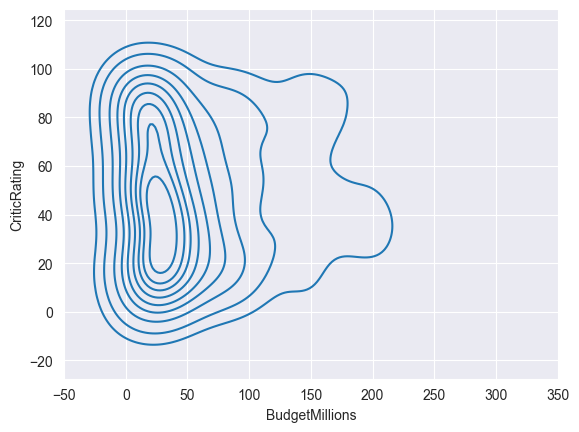

In [23]:
kl = sns.kdeplot(movies, x='BudgetMillions', y='CriticRating')

[(-20.0, 160.0)]

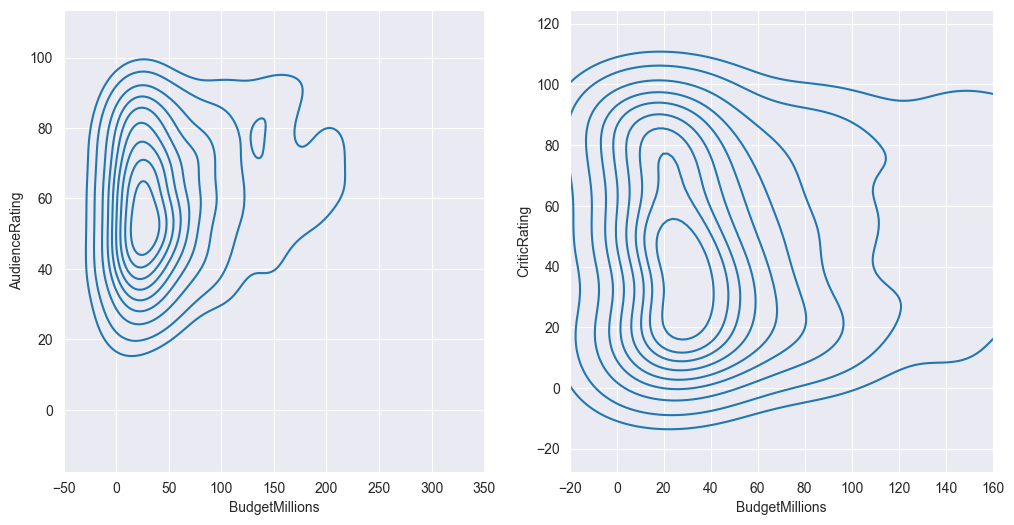

In [24]:
from matplotlib.pyplot import xlim


f, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns
kl = sns.kdeplot(movies, x='BudgetMillions', y='AudienceRating', ax=axes[0])
kl = sns.kdeplot(movies, x='BudgetMillions', y='CriticRating', ax=axes[1])
kl.set(xlim=(-20, 160)) # Setting the x limit from -20 to 160


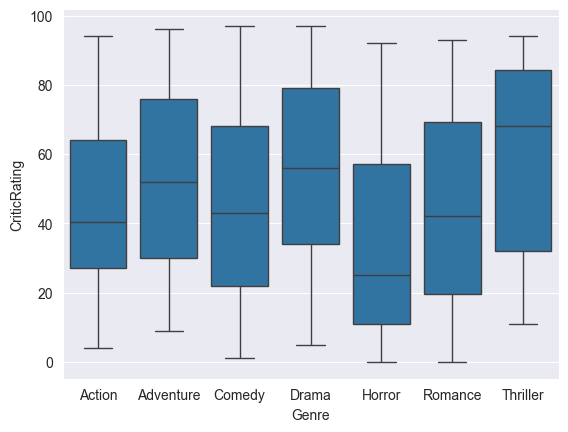

In [25]:
# Using boxplots and violinplots
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

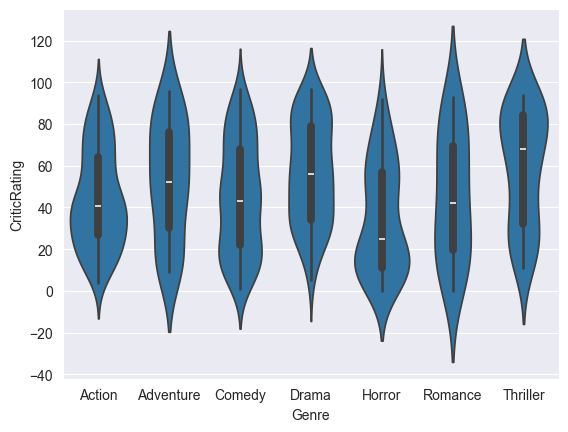

In [26]:
# Violin Plots
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

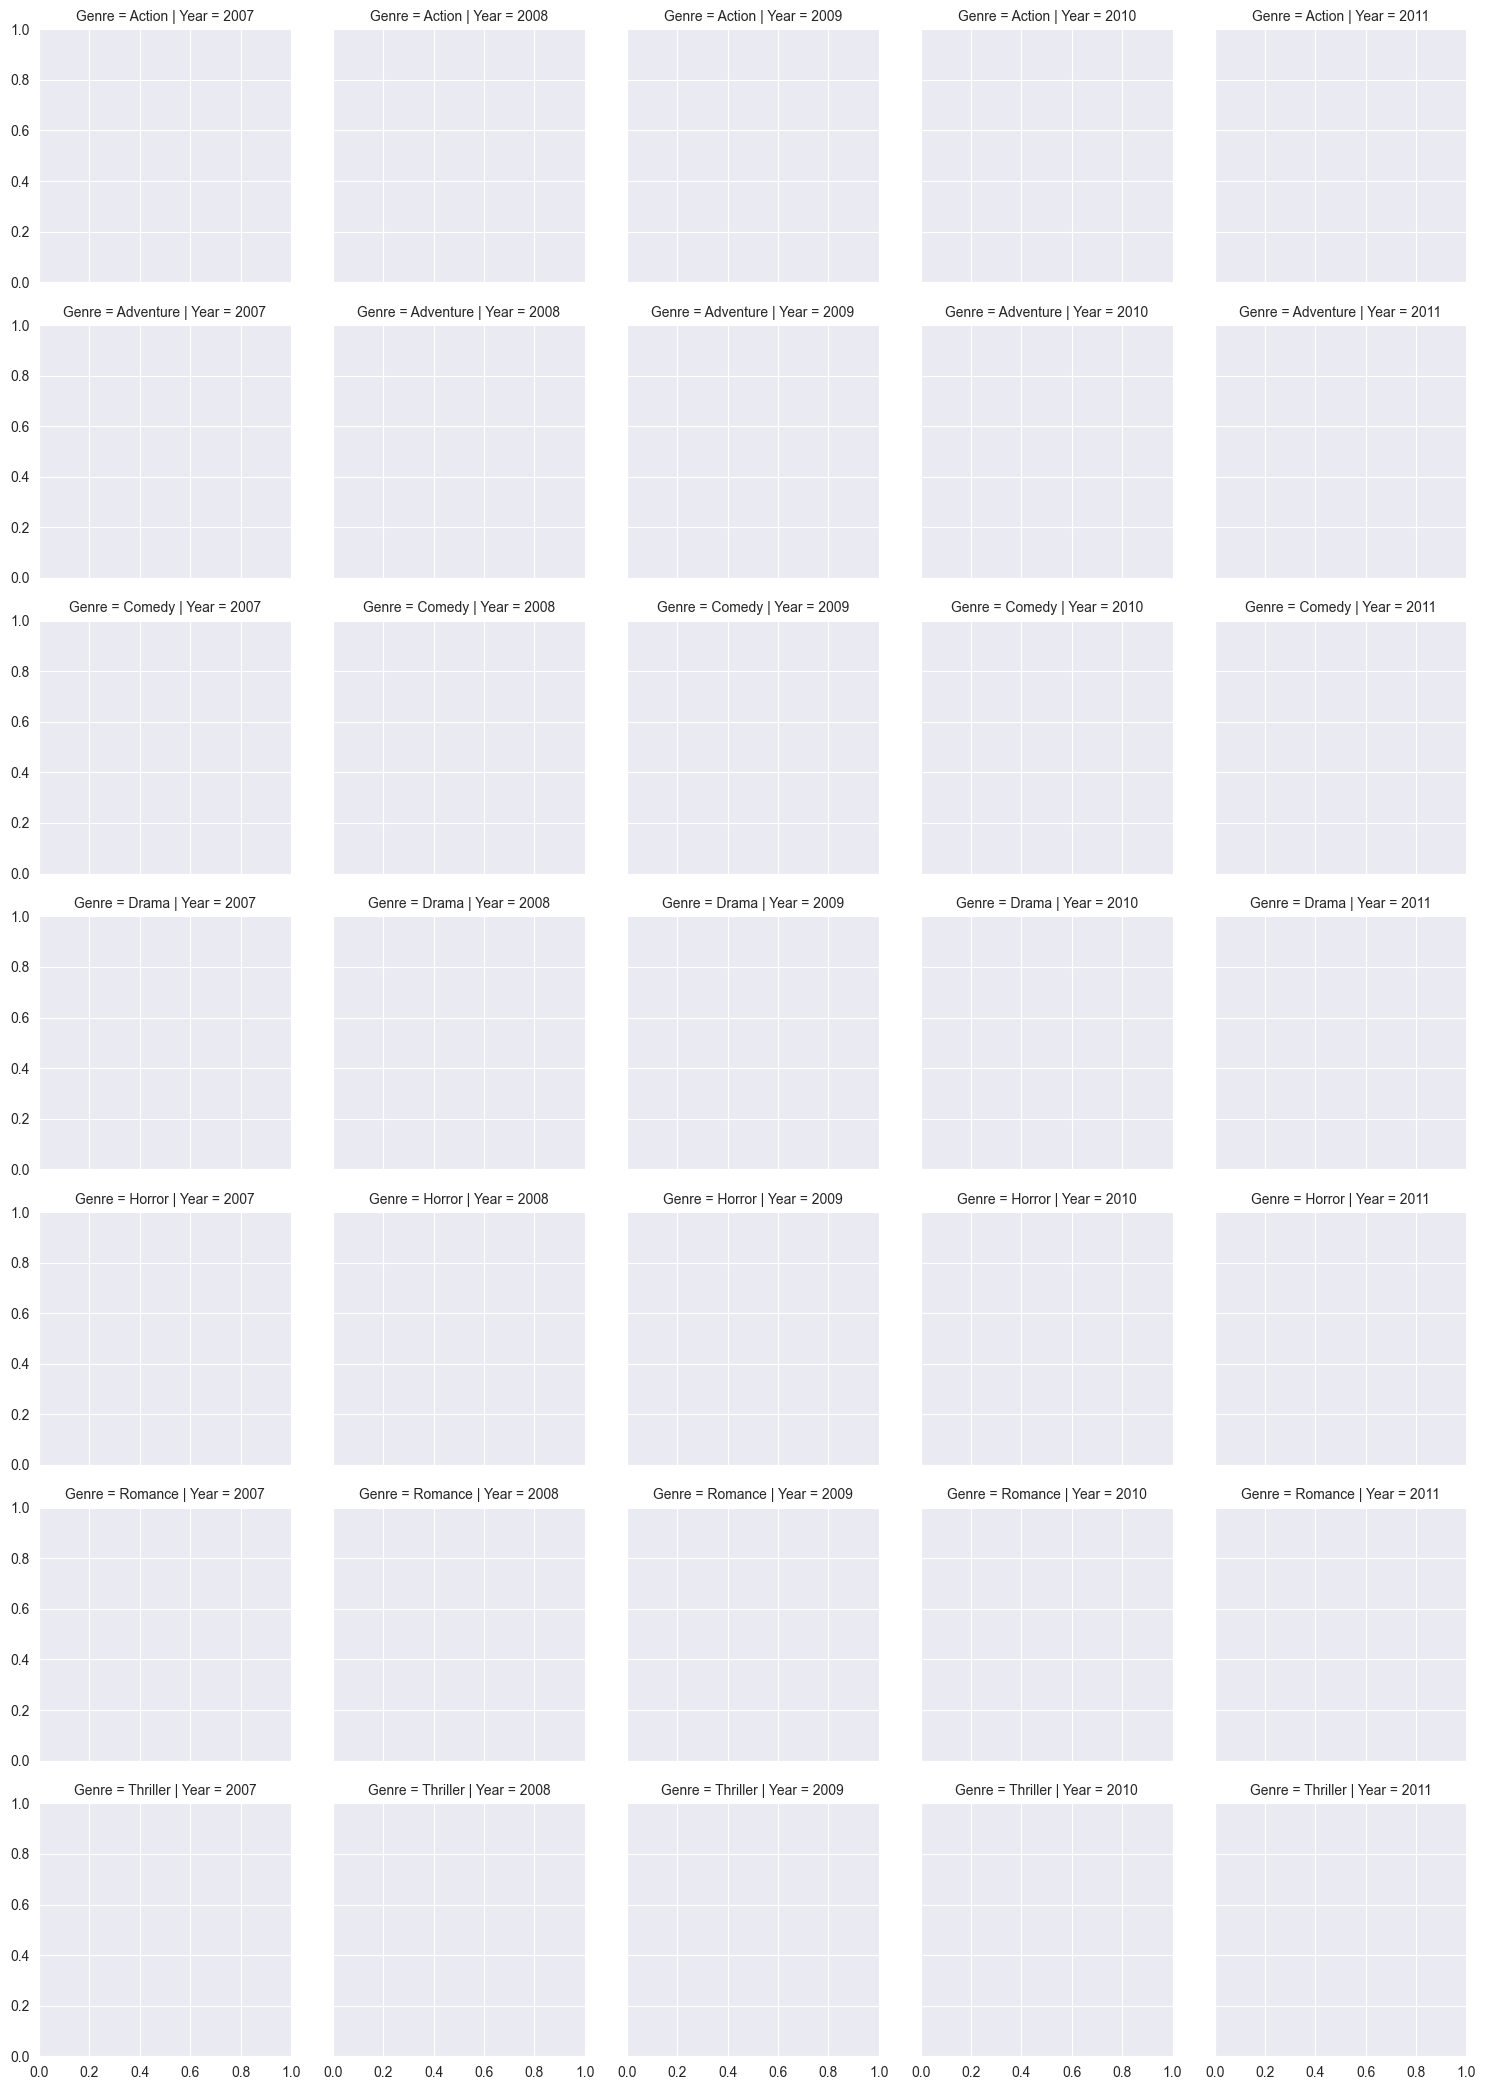

In [27]:
# Creationg a facet grid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

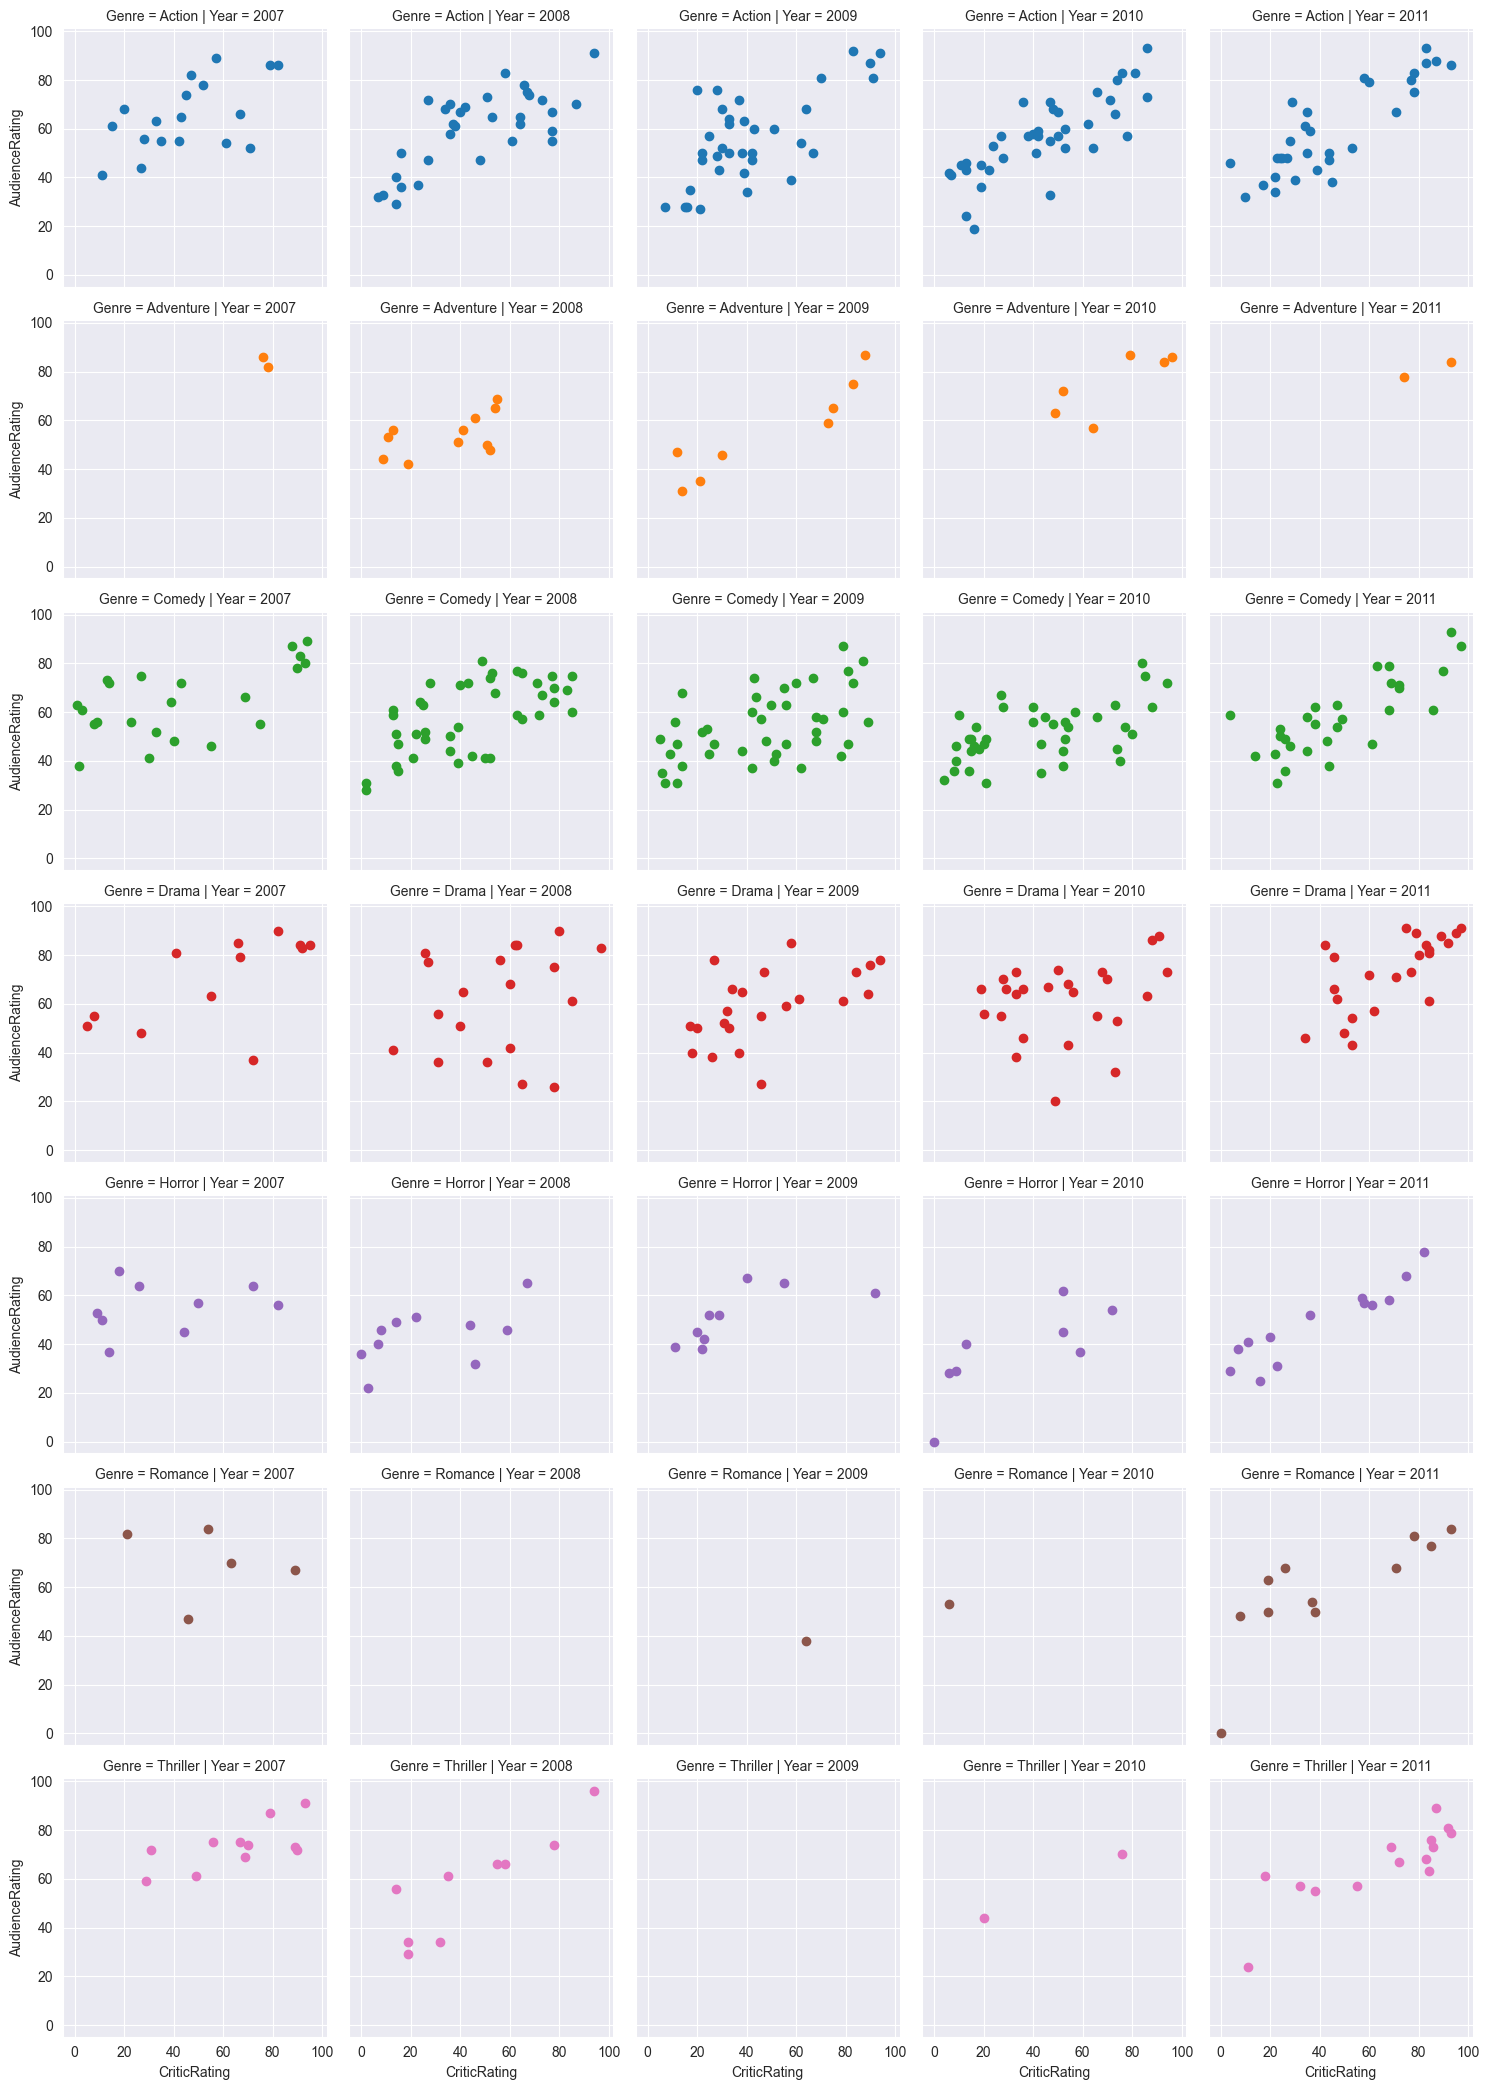

In [28]:
# Scatterplots
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

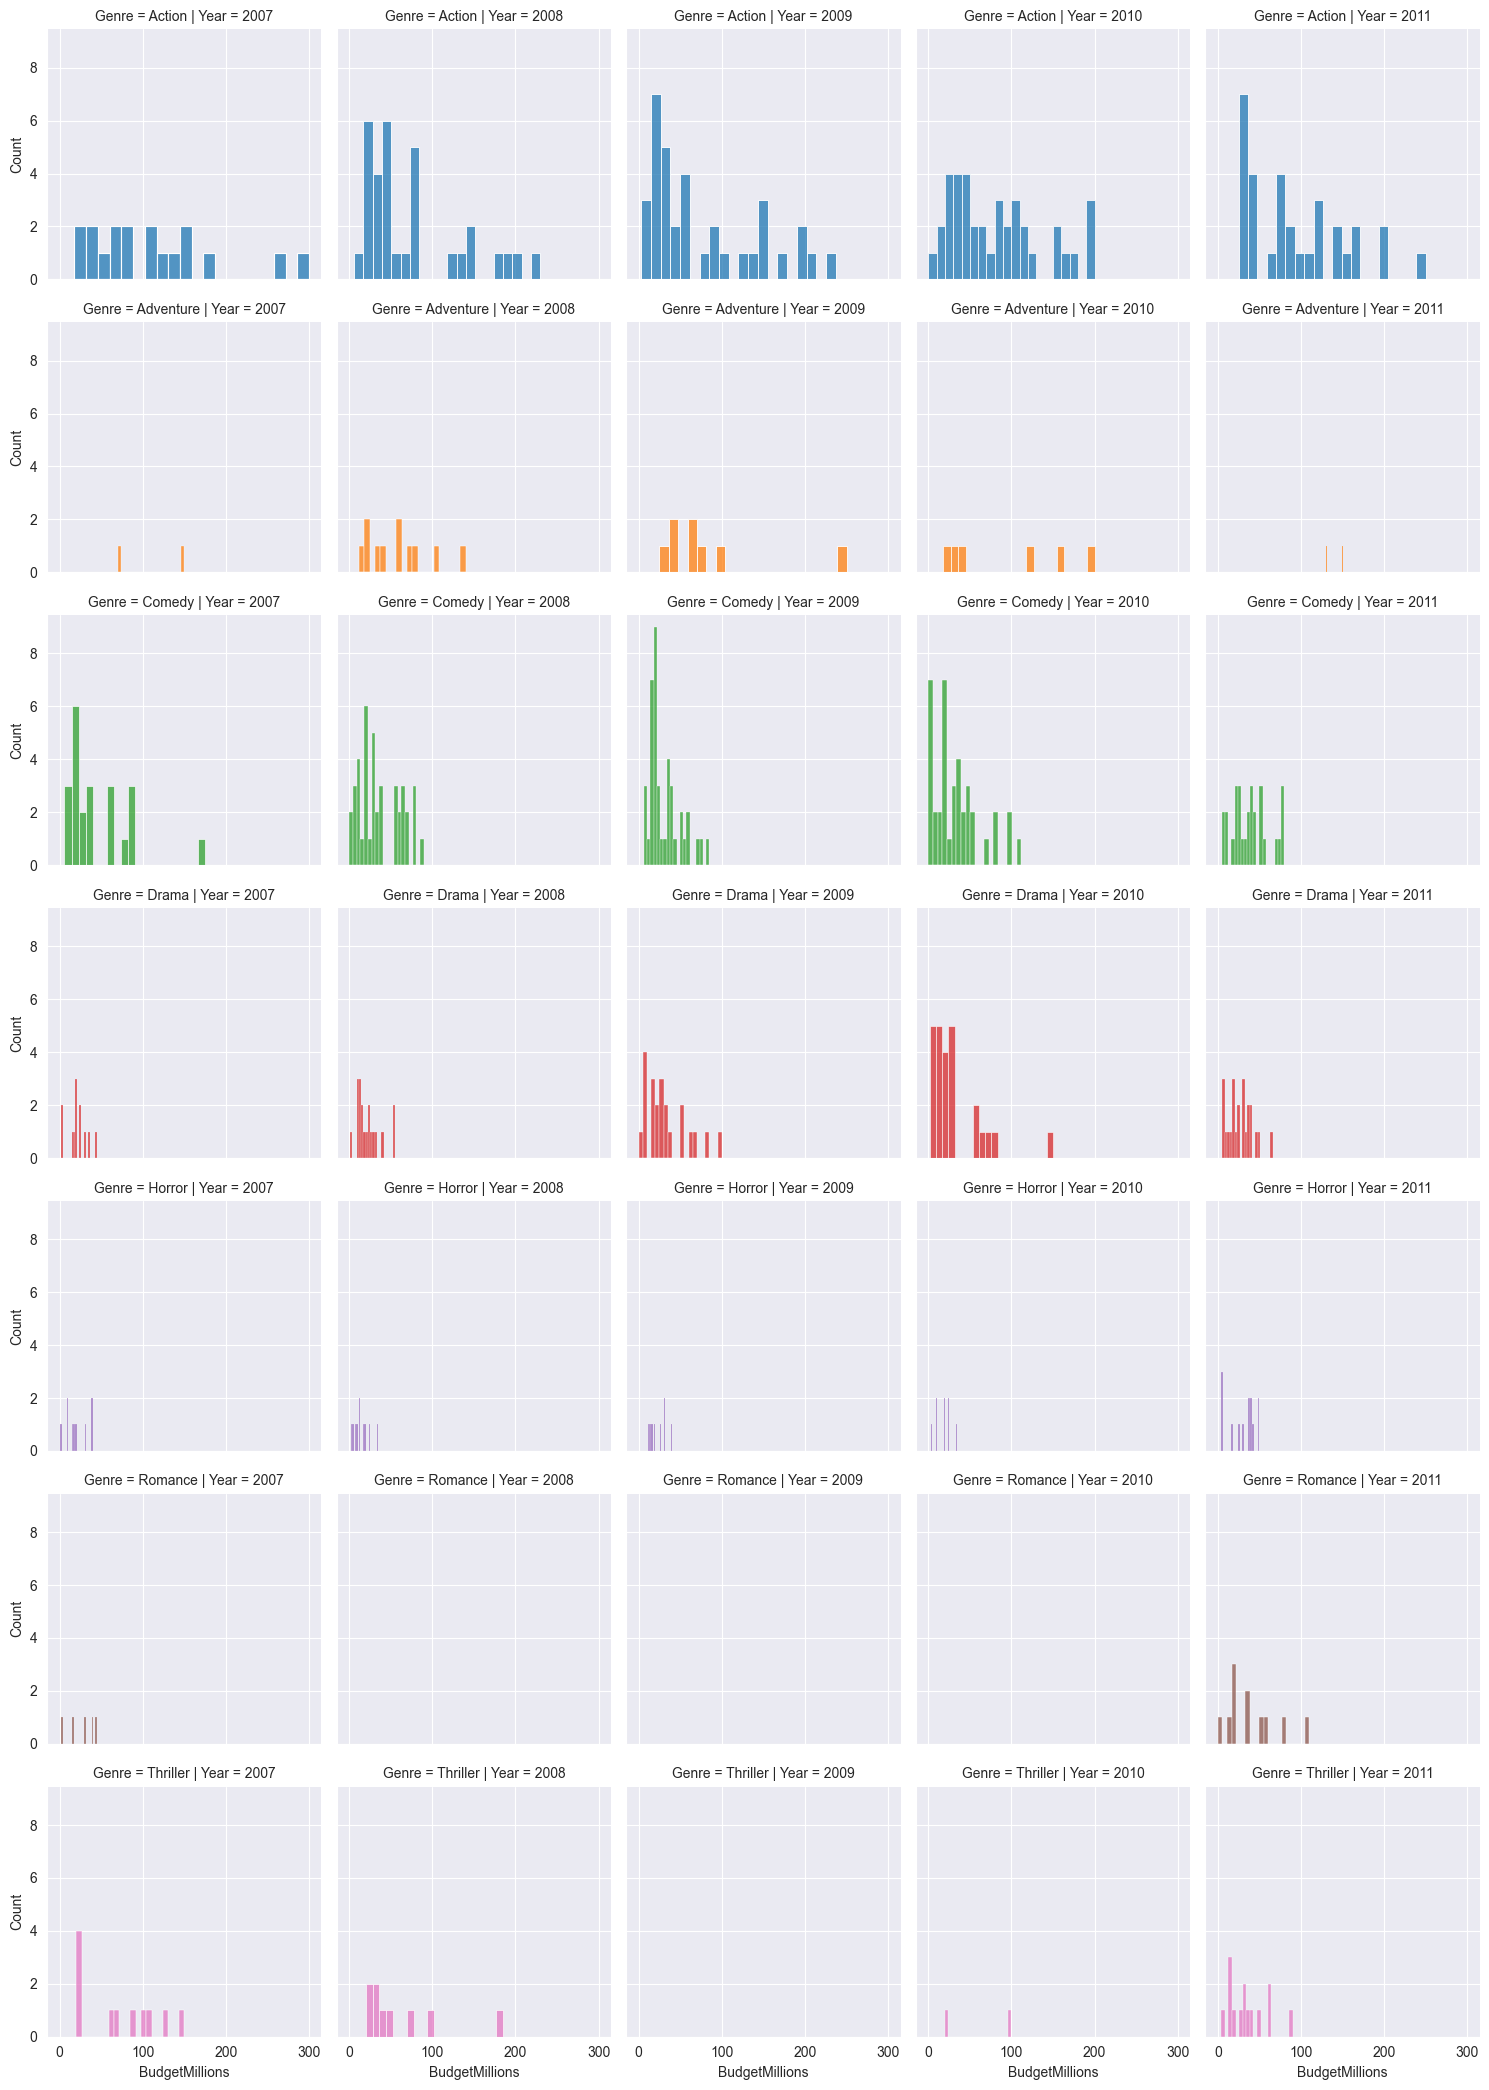

In [29]:
# Can populate with different charts like histograms, kdeplots, etc
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(sns.histplot, 'BudgetMillions', bins=20)

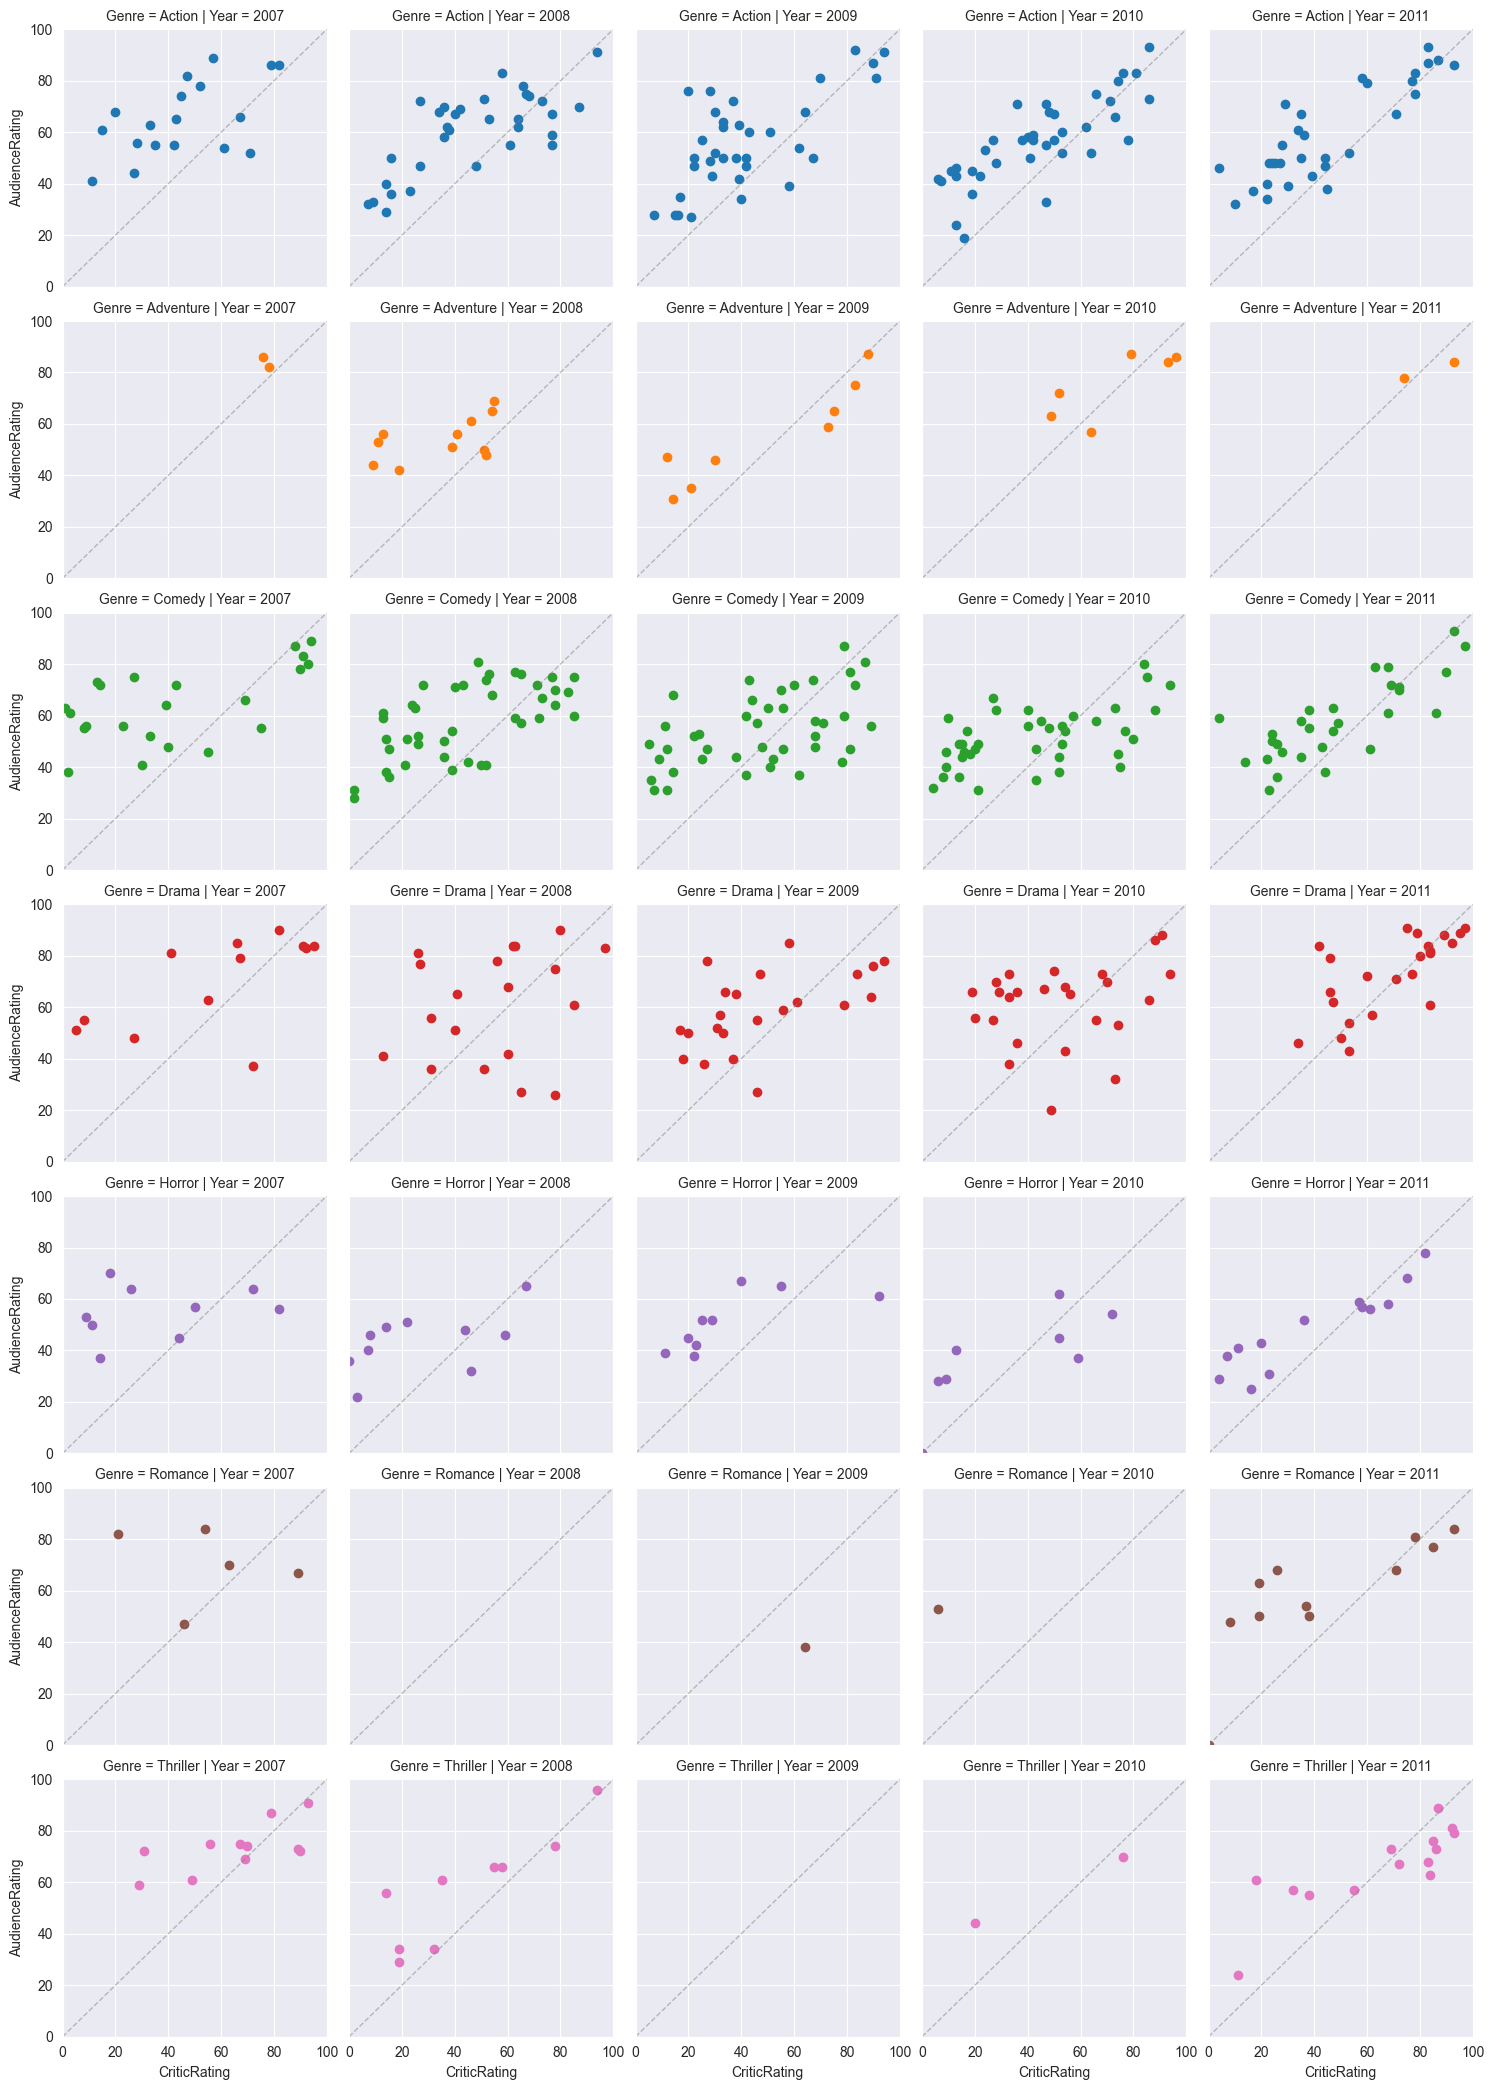

In [30]:
# Coordinates and Diagonals. Controling the axes and adding a diagonal
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, edgecolor='black', linewidth=0.5) # s is the size of the dots
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')
g.set(xlim=(0, 100), ylim=(0, 100)) # Setting the limits of the axes

# Adding a diagonal
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c='grey', ls='--', lw=1, alpha=0.5, ) # (0,100) is the start and end of the line in x and y. ls is line style, lw is line width, alpha is transparency

In [31]:
# Building a dashboard with all the charts together
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

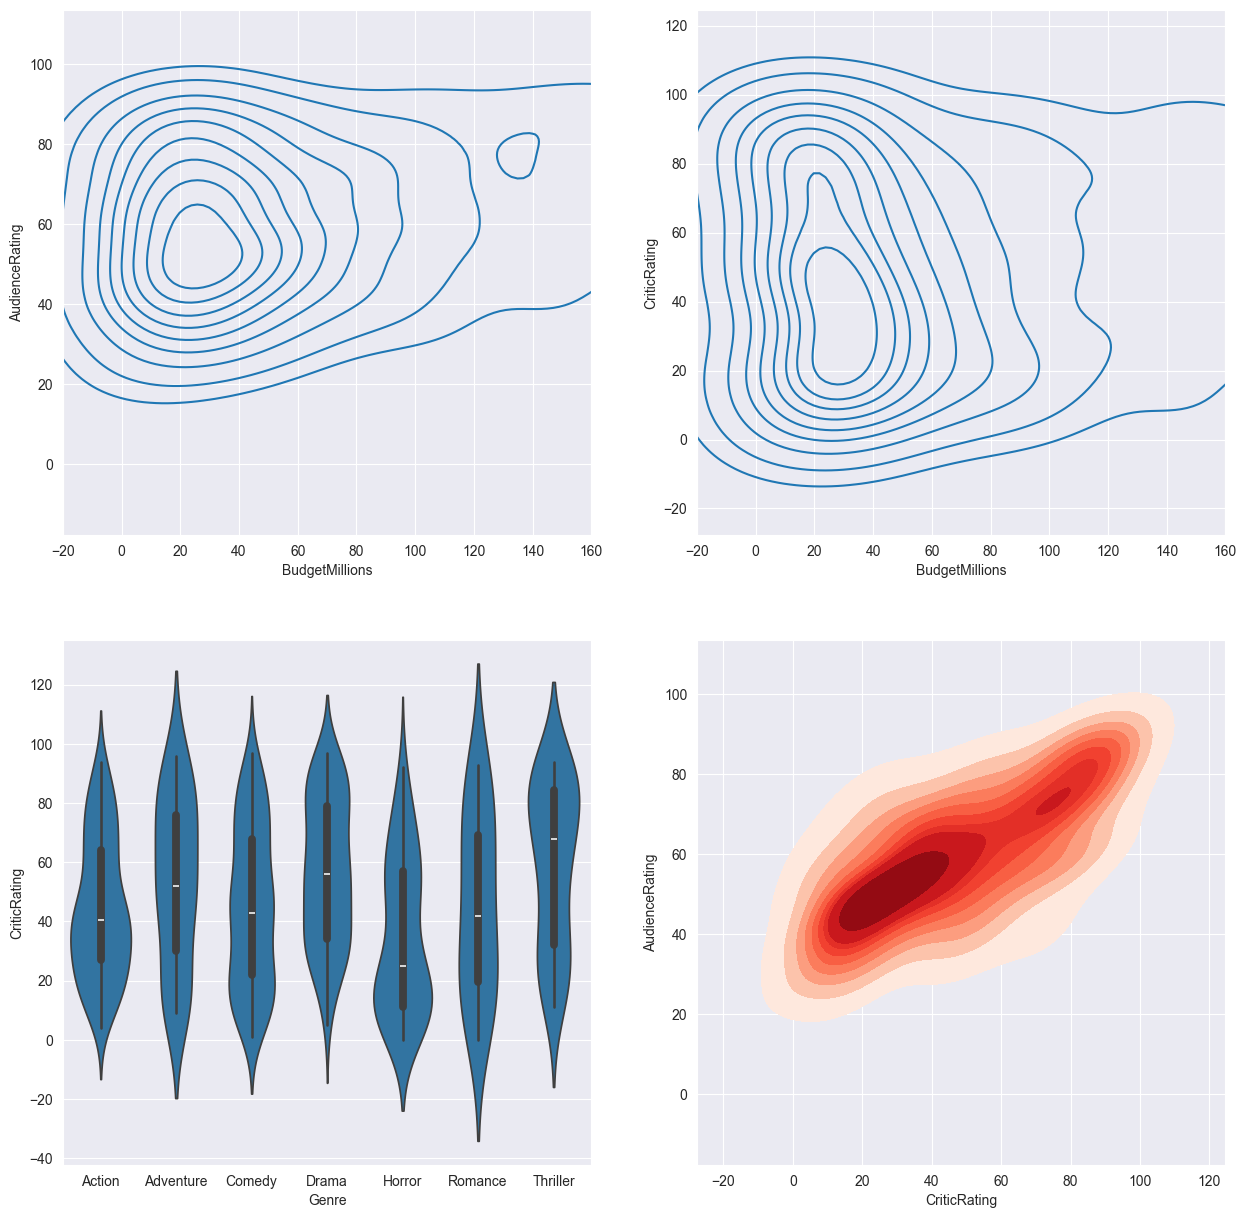

In [32]:
# Above examples only work for seaborn plots. For matplotlib ones, you need to do it differently
f, axes = plt.subplots(2, 2, figsize=(15, 15)) # 2 rows, 2 columns
sns.set_style('darkgrid')
k1 = sns.kdeplot(movies, x='BudgetMillions', y='AudienceRating', ax=axes[0, 0])
k2 = sns.kdeplot(movies, x='BudgetMillions', y='CriticRating', ax=axes[0, 1])

z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 0])

k1.set(xlim=(-20, 160)) # Setting the x limit from -20 to 160
k2.set(xlim=(-20, 160)) # Setting the x limit from -20 to 160

k4 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 shade=True, cmap='Reds', ax=axes[1, 1])

(array([ 9., 16., 23., 32., 22., 30., 31., 23., 16., 28., 29., 27., 24.,
        30., 22., 17., 14., 24., 23., 19., 24., 24., 18., 21., 13.]),
 array([ 0.  ,  3.88,  7.76, 11.64, 15.52, 19.4 , 23.28, 27.16, 31.04,
        34.92, 38.8 , 42.68, 46.56, 50.44, 54.32, 58.2 , 62.08, 65.96,
        69.84, 73.72, 77.6 , 81.48, 85.36, 89.24, 93.12, 97.  ]),
 <BarContainer object of 25 artists>)

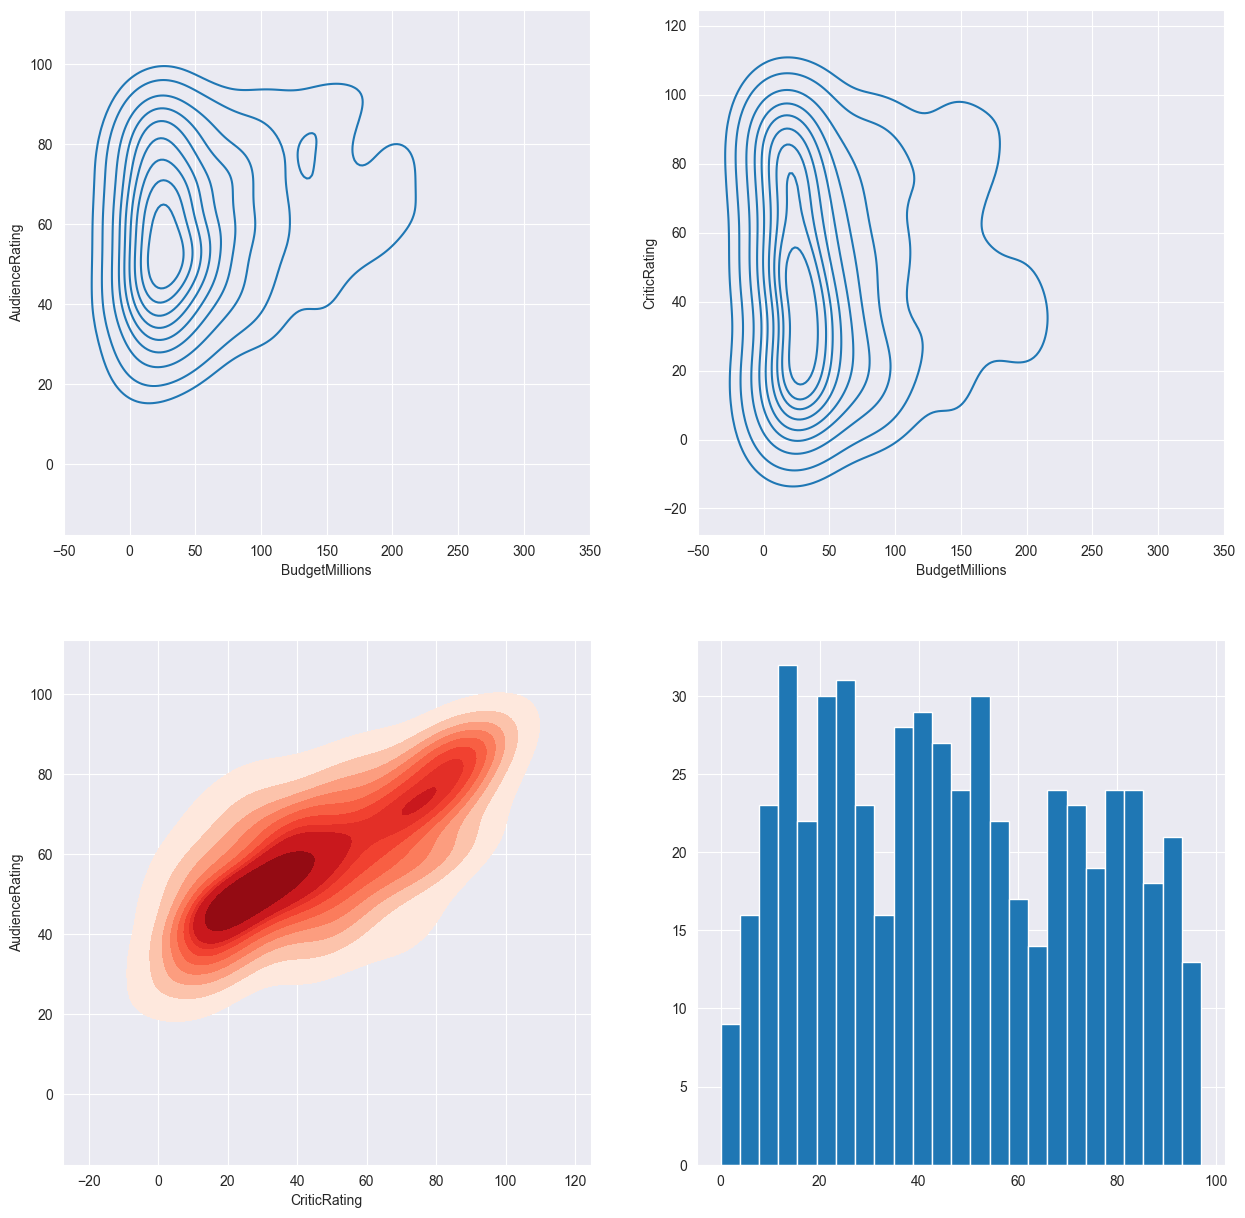

In [33]:
f, axes = plt.subplots(2, 2, figsize=(15, 15)) # 2 rows, 2 columns
sns.set_style('darkgrid')
k1 = sns.kdeplot(movies, x='BudgetMillions', y='AudienceRating', ax=axes[0, 0])
k2 = sns.kdeplot(movies, x='BudgetMillions', y='CriticRating', ax=axes[0, 1])

k4 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating', \
                 shade=True, cmap='Reds', ax=axes[1, 0])

axes[1,1].hist(movies.CriticRating, bins=25) # Adding a histogram in the last subplot

In [34]:
# Extra: Styling Tips
